In [1]:
%pylab inline
from datascience import *
import pandas as pd
import numpy as np
import os
import re

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Notes

- Changed all [he, she] into [he/ she]
- Changed all [itself, themselves] to [itself/ themselves]

In [2]:
with open('Enmerkar.txt', 'r') as text_file:
    enmerkar = text_file.read()

In [3]:
enmerkar_list = enmerkar.split(':')
enmerkar_list = [word for word in enmerkar_list if '[' in word]

In [4]:
etcsl_words = re.findall(r"(?<=\[)(.*?)(?=\])", enmerkar)
etcsl_words = [word for word in etcsl_words if word != '1']
etcsl_words

['brick(work)',
 '(mountain) land',
 'shining',
 'to go out or in',
 'brick(work)',
 'flat space',
 'lapis lazuli',
 'to go out or in',
 'town',
 'heaven',
 'place',
 'to grow',
 'name',
 'rainbow',
 'heaven',
 'to be adjacent',
 'brilliance',
 'to be multicoloured',
 'heaven',
 'to stand',
 'crescent (moon)',
 'to be new',
 'to be',
 'essence',
 'to be big',
 'princeliness',
 'to erect',
 '(mountain) land',
 'to be pure',
 'day(light)',
 'to be good',
 'place',
 'to place',
 'moon(light)',
 'the Land',
 'to go out or in',
 'day(light)',
 'to be shining',
 'the Land',
 'horn',
 'to equal',
 'rear cow',
 'type of cow',
 'abundance',
 'to go out or in',
 'mouth',
 'to cut',
 '(mountain) land',
 'to approach',
 '(awesome) radiance',
 'bright metal',
 'right',
 'garment',
 'to cover (together)',
 'linen (fibre)',
 'to release',
 'day(light)',
 'day(light)',
 'lord',
 'night',
 'dais',
 'king',
 'minister',
 'lord',
 'minister',
 'name',
 'to be',
 'minister',
 'lord',
 'name',
 'lord',
 't

In [5]:
Enmerkar_table = Table.read_table('Enmerkar.txt', sep = ',')
Enmerkar_table = Enmerkar_table.drop(['text_name', 'etcsl_no'])
Enmerkar_table

l_no,text
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...


In [6]:
proper_nouns = {
'CN': 'Constellation Name (star)',
'DN': 'Deity Name',
'EN': 'Ethnicity Name',
'FN': 'Field Name',
'GN': 'Geographical Name (for regions and countries)',
'MN': 'Month Name',
'ON': 'Object Name (usually for objects associated with a god)',
'PN': 'Personal Name',
'RN': 'Royal Name',
'SN': 'Settlement Name',
'TN': 'Temple Name',
'WN': 'Water Name',
}

simple_terms = {
    'AJ': 'Adjective',
    'AV': 'Adverb',
    'C': 'Conjunction',
    'N': 'Noun',
    'NU': 'Number',
    'PD': 'Part of Speech',
    'V': 'Verb',
}

In [7]:
def term_finder (line):
    #returns the meanings of words in a line of text
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    return terms

def proper_noun_finder(line):
    #returns a list of all the proper nouns in a line of text
    nouns = re.findall(r"(?<=\:)(.*?)(?=\[)", line)
    nouns = [word for word in nouns if (len(word) > 1 and word[0].isupper() and not word[1].isupper())]
    return nouns

def speech_article_finder(line, proper_noun_filter = True):
    #returns the speech articles for proper_nouns or all words
    terms = re.findall(r"(?<=\])(.*?)(?=\s)", line)
    if proper_noun_filter:
        articles = [term for term in terms if term in proper_nouns]
    else: 
        articles = terms
    return articles

In [8]:
Enmerkar_table = Enmerkar_table.with_columns([
    'terms', Enmerkar_table.apply(term_finder, 'text'), 
    'proper_nouns', Enmerkar_table.apply(proper_noun_finder, 'text'), 
    'speech_articles', Enmerkar_table.apply(speech_article_finder, 'text')
    ])

Enmerkar_table.show()

l_no,text,terms,proper_nouns,speech_articles
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...,"['brick(work)', '(mountain) land', 'shining', 'to go out ...",[],[]
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...,"['1', 'town', 'heaven', 'place', 'to grow']",['Kulaba'],['SN']
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N,"['1', 'name', 'rainbow']",['Unug'],['SN']
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...,"['heaven', 'to be adjacent', 'brilliance', 'to be multic ...",[],[]
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...,"['heaven', 'to stand', 'crescent (moon)', 'to be new', ' ...",[],[]
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...,"['essence', 'to be big', 'princeliness', 'to erect']",[],[]
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...,"['(mountain) land', 'to be pure', 'day(light)', 'to be g ...",[],[]
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...,"['moon(light)', 'the Land', 'to go out or in']",[],[]
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...,"['day(light)', 'to be shining', 'the Land', 'horn', 'to ...",[],[]
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...,"['rear cow', 'type of cow', 'abundance', 'to go out or in']",[],[]


In [9]:
def partitioning(line_no):
    
    ln = int(''.join(c for c in line_no if c.isdigit()))

    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    
    elif (ln <= 39):
        return "2.1.1"
    elif (ln <= 51):
        return "2.1.2"
    elif (ln <= 69):
        return "2.1.3"
    
    elif (ln <= 76):
        return "2.2.1"
    elif (ln <= 90):
        return "2.2.2"
    elif (ln <= 113):
        return "2.2.3"
    
    elif (ln <= 127):
        return "2.3.1"
    elif (ln <= 132):
        return "2.3.2"
    elif (ln <= 134):
        return "2.3.3"
    
    elif (ln <= 138):
        return "3.1.1"
    elif (ln <= 149):
        return "3.1.2"
    elif (ln <= 162):
        return "3.1.3"
    elif (ln <= 169):
        return "3.1.4"
    
    elif (ln <= 184):
        return "3.2.1"
    elif (ln <= 197):
        return "3.2.2"
    elif (ln <= 205):
        return "3.2.3"
    elif (ln <= 210):
        return "3.2.4"
    elif (ln <= 221):
        return "3.2.5"
    
    elif (ln <= 227):
        return "4.1"
    
    elif (ln <= 248):
        return "4.2.1"
    elif (ln <= 254):
        return "4.2.2"
    elif (ln <= 263):
        return "4.2.3"
    elif (ln <= 273):
        return "4.2.4"
    
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "B"
    return "0"

def small_partition(line_no):
    ln = int(''.join(c for c in line_no if c.isdigit()))
    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    elif (ln <= 69):
        return "2.1"
    elif (ln <= 113):
        return "2.2"
    elif (ln <= 134):
        return "2.3"
    elif (ln <= 169):
        return "3.1"
    elif (ln <= 221):
        return "3.2"
    elif (ln <= 227):
        return "4.1"
    elif (ln <= 273):
        return "4.2"
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "6"
    return "0"

In [10]:
Enmerkar_table.append_column('section', Enmerkar_table.apply(partitioning, 'l_no'))
Enmerkar_graph = Enmerkar_table.select(['proper_nouns', 'speech_articles', 'section']).group('section', list)
Enmerkar_graph

section,proper_nouns list,speech_articles list
1.1,"[[], ['Kulaba'], ['Unug'], [], [], [], [], [], [], [], [ ...","[[], ['SN'], ['SN'], [], [], [], [], [], [], [], ['SN'], ..."
1.2,"[['Utu'], ['Aratta', 'Ansiga-ria'], ['Enmerkar', 'Kulaba ...","[['DN'], ['SN', 'PN'], ['RN', 'SN', 'PN'], [], [], [], [ ..."
2.1.1,"[['Unug', 'Kulaba'], ['Aratta', 'En-suhgir-ana'], ['Unug ...","[['SN', 'SN'], ['SN'], ['SN'], [], ['SN'], ['DN'], ['DN' ..."
2.1.2,"[[], [], [], [], [], ['Šakkan'], [], [], [], [], [], []]","[[], [], [], [], [], ['DN'], [], [], [], [], [], []]"
2.1.3,"[[], ['Enmerkar'], [], ['Aratta', 'En-suhgir-ana'], [], ...","[[], ['RN'], [], ['SN', 'RN'], [], ['RN'], [], ['RN'], [ ..."
2.2.1,"[['Unug'], [], [], [], ['Aratta'], ['Aratta'], []]","[['SN'], [], [], [], ['SN'], ['SN'], []]"
2.2.2,"[[], ['Inana', 'E-zagin', 'Aratta'], [], [], ['Inana'], ...","[[], ['DN', 'TN', 'SN'], [], [], ['DN'], [], [], [], [], ..."
2.2.3,"[['Enlil'], ['Ninurta', 'Enlil'], [], ['Aruru', 'Enlil'] ...","[['DN'], ['DN'], [], ['DN'], [], [], ['DN'], [], [], [], ..."
2.3.1,"[['Enmerkar', 'En-suhgir-ana'], [], [], ['En-suhgir-ana' ...","[['RN'], [], [], ['RN'], [], [], [], ['SN', 'SN'], [], [ ..."
2.3.2,"[[], ['Unug'], ['Enmerkar'], ['Enmerkar'], []]","[[], ['SN'], ['RN'], ['RN'], []]"


In [11]:
def list_flattening(pn_list):
    return [noun for nouns in pn_list for noun in nouns]

Enmerkar_graph.append_column('speech articles', Enmerkar_graph.apply(list_flattening, 'speech_articles list'))
Enmerkar_graph.append_column('proper nouns', Enmerkar_graph.apply(list_flattening, 'proper_nouns list'))
Enmerkar_graph = Enmerkar_graph.drop(['proper_nouns list', 'speech_articles list'])
Enmerkar_graph

section,speech articles,proper nouns
1.1,"['SN', 'SN', 'SN', 'SN', 'PN', 'PN']","['Kulaba', 'Unug', 'Unug', 'Aratta', 'Ur-ŋiri-nuna', 'An ..."
1.2,"['DN', 'SN', 'PN', 'RN', 'SN', 'PN']","['Utu', 'Aratta', 'Ansiga-ria', 'Enmerkar', 'Kulaba', 'N ..."
2.1.1,"['SN', 'SN', 'SN', 'SN', 'SN', 'DN', 'DN', 'TN', 'SN', ' ...","['Unug', 'Kulaba', 'Aratta', 'En-suhgir-ana', 'Unug', 'I ..."
2.1.2,['DN'],['Šakkan']
2.1.3,"['RN', 'SN', 'RN', 'RN', 'RN', 'DN', 'DN', 'TN', 'SN', ' ...","['Enmerkar', 'Aratta', 'En-suhgir-ana', 'En-suhgir-ana', ..."
2.2.1,"['SN', 'SN', 'SN']","['Unug', 'Aratta', 'Aratta']"
2.2.2,"['DN', 'TN', 'SN', 'DN', 'DN', 'DN']","['Inana', 'E-zagin', 'Aratta', 'Inana', 'Inana', 'Utu']"
2.2.3,"['DN', 'DN', 'DN', 'DN', 'DN', 'SN', 'SN', 'SN', 'SN', ' ...","['Enlil', 'Ninurta', 'Enlil', 'Aruru', 'Enlil', 'Anzud', ..."
2.3.1,"['RN', 'RN', 'SN', 'SN', 'SN', 'SN', 'SN']","['Enmerkar', 'En-suhgir-ana', 'En-suhgir-ana', 'Unug', ' ..."
2.3.2,"['SN', 'RN', 'RN']","['Unug', 'Enmerkar', 'Enmerkar']"


In [12]:
def partitioner (i):
    rows = []
    section = Enmerkar_graph['section'][i]
    speech_articles = Enmerkar_graph['speech articles'][i]
    proper_nouns = Enmerkar_graph['proper nouns'][i]
    for j in range(len(speech_articles)):
        article = speech_articles[j]
        proper_noun = proper_nouns[j]
        rows.append([section, article, proper_noun])
    return rows

Enmerkar_table_section = Table(['section', 'speech articles', 'proper nouns'])
for i in range(Enmerkar_graph.num_rows):
    Enmerkar_table_section = Enmerkar_table_section.with_rows(partitioner(i))
Enmerkar_table_section

section,speech articles,proper nouns
1.1,SN,Kulaba
1.1,SN,Unug
1.1,SN,Unug
1.1,SN,Aratta
1.1,PN,Ur-ŋiri-nuna
1.1,PN,Ansiga-ria
1.2,DN,Utu
1.2,SN,Aratta
1.2,PN,Ansiga-ria
1.2,RN,Enmerkar


In [13]:
proper_noun_by_section = Enmerkar_table_section.pivot('proper nouns', rows = 'section')
name_counts = []
for name in proper_noun_by_section.drop('section').labels:
    name_counts.append([name, np.sum(proper_noun_by_section[name])])

top_7_names = ['Aratta', 'En-suhgir-ana', 'Enmerkar', 'Inana', 'Nisaba', 'Saŋburu', 'Unug']

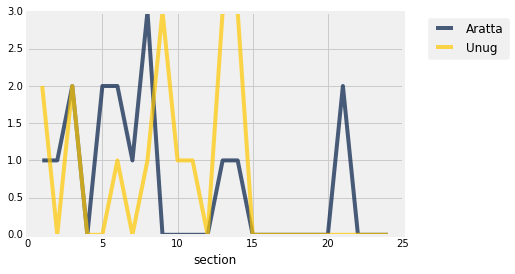

In [14]:
names_graph = proper_noun_by_section.with_column(
    'section', range(1, proper_noun_by_section.num_rows+1))

top_7_names_graph = names_graph.select(['Aratta', 'Unug', 'section']).plot('section')
#notice Aratta is the only one mentioned in the section 4.2.3

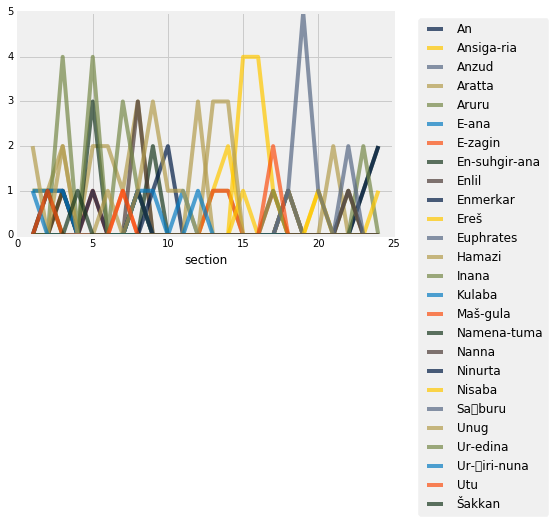

In [15]:
names_graph.plot('section')

Niccholas Veldhuis


Github Notebook is a good example of the level of work. He is uncertain about if it is really the best way to do this textual analysis. 

- Data science and pandas used simultaneously
- Silly errors about initializing variables and stuff

Roles:
-Double check coding to make sure it’s clean and runs efficiently
-Help Niek with writing code in tough spots when he doesn’t know how to proceed

Timeline: 
1 week: Understand the standards and look for assistants
1 month: Have an assistant and connect him/her with Niccholas
1 year: Maintain a team that can successfully assist with research
